<a href="https://colab.research.google.com/github/hncpyj/DataAnalytics/blob/main/mva_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

2장 4번 Python을 이용한 주성분분석 실행과 해석

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Py 2.1
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1973년 미국 50개 주 각각에서 폭행, 살인 및 강간으로 체포된 주민
# 10만명당 체포된 통계 데이터를 불러와서 변수에 저장한다.
# 데이터 읽기
data = pd.read_csv("/content/drive/MyDrive/DataAnalytics/MultivariateAnalysis/mva/ex2-4.csv")
# 1-1. 데이터를 확인한다.
# 4개의 변수에 대한 50개의 관측치가 있다.
data.head(3)

,state,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0


In [ ]:
# 변수의 이름을 확인한다.
data.columns

Index(['state', 'Murder', 'Assault', 'UrbanPop', 'Rape'], dtype='object')

In [ ]:
# 1-2. 요약통계량을 확인한다. – 소수점 이하 2자리 반올림 표시
round(data.describe(), 2)

,Murder,Assault,UrbanPop,Rape
count,50.00,50.00,50.00,50.00
mean,7.79,170.76,65.54,21.23
std,4.36,83.34,14.47,9.37
min,0.80,45.00,32.00,7.30
25%,4.08,109.00,54.50,15.08
50%,7.25,159.00,66.00,20.10
75%,11.25,249.00,77.75,26.18
max,17.40,337.00,91.00,46.00


In [ ]:
# 2. 자료 변형하기
# 각 변수의 값의 차이가 크기 때문에 표준화가 필요할 것으로 판단되어
# 차이를 일관되게 하기 위하여 표준화를 진행한다.
data_sc = (np.min(data)/(np.max(data)-np.min(data)))
data.hurdles = np.max(data.hurdles) - data.hurdles
data.run200m = np.max(data.run200m) - data.run200m
data.run800m = np.max(data.run800m) - data.run800m
data.head()

# 분석변수 선택하기
feature = ['hurdles','highjump','shot','run200m','longjump','javelin','run800m']
data_data = data[feature]
# data_data = data.iloc{:, 1:8]
# data_data = data.iloc{:, 1:-1]

# 변수 표준화
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(data_data)

TypeError: ignored

In [ ]:

# 분석변수 선택하기
feature = ['hurdles','highjump','shot','run200m','longjump','javelin','run800m']
data_data = data[feature]
# data_data = data.iloc{:, 1:8]
# data_data = data.iloc{:, 1:-1]

# 변수 표준화
from sklearn.preprocessing import StandardScaler
x = StandardScaler().fit_transform(data_data)

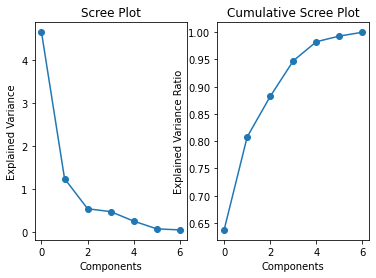

In [ ]:
# Py 2.3
# 초기 주성분분석
from sklearn.decomposition import PCA
pca_init = PCA(n_components=len(data_data.columns))
pca_init.fit(x)
pca_init.explained_variance_
np.cumsum(pca_init.explained_variance_ratio_)

# 스크리 그림 그리기
plt.figure()
plt.subplot(121)
plt.plot(pca_init.explained_variance_, 'o-')
plt.title('Scree Plot')
plt.xlabel('Components')
plt.ylabel('Explained Variance')

plt.subplot(122)
plt.plot(np.cumsum(pca_init.explained_variance_ratio_), 'o-')
plt.title('Cumulative Scree Plot')
plt.xlabel('Components')
plt.ylabel('Explained Variance Ratio')
plt.show()

In [ ]:
# Py 2.4
# 주성분분석 – 주성분 수 2개 추출
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
data_pca = pca.fit_transform(x)
# dir(pca)
# 주성분분산
pca.explained_variance_

# 주성분분산 비율
pca.explained_variance_ratio_

# 주성분계수
np.round(pca.components_, 3)
# 주성분점수
data_pca[0:5,:]

array([[-4.20643487,  1.26802363],
       [-2.9416187 ,  0.53452561],
       [-2.70427114,  0.69275901],
       [-1.37105209,  0.70655862],
       [-1.38704979,  1.78931718]])

In [ ]:
# Py 2.5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 데이터 읽기
beer = pd.read_csv("/beer.csv")
# beer = pd.read_csv("c:/data/mva/beer.csv") (본인이 저장한 경로로 지정해주어야 합니다!)
beer.head()

# 기술통계량 구하기
beer.describe()

,cost,size,alcohol,reputat,color,aroma,taste
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,27.777778,22.222222,23.888889,55.555556,63.888889,56.111111,80.555556
std,31.349106,20.256294,12.259015,25.891147,18.162469,19.789138,17.318872
min,0.000000,0.000000,10.000000,30.000000,40.000000,30.000000,50.000000
25%,10.000000,10.000000,15.000000,30.000000,50.000000,40.000000,65.000000
50%,15.000000,15.000000,20.000000,40.000000,60.000000,60.000000,85.000000
75%,25.000000,30.000000,30.000000,80.000000,80.000000,65.000000,95.000000
max,100.000000,70.000000,50.000000,100.000000,95.000000,90.000000,100.000000


In [ ]:
# Py 2.6
# 주성분분석 – 주성분 수 3으로 함
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca_beer = pca.fit_transform(beer)

# 주성분분산
pca.explained_variance_

# 주성분 표준편차
np.sqrt(pca.explained_variance_)

# 주성분분산 비율
pca.explained_variance_ratio_

# 주성분계수
np.round(pca.components_, 3)

array([[ 0.734,  0.394,  0.283, -0.336,  0.266,  0.14 ,  0.149],
       [-0.319, -0.34 , -0.069, -0.491,  0.344,  0.485,  0.429],
       [-0.19 ,  0.127,  0.037, -0.786, -0.386, -0.369, -0.206]])